# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [13]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6"
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6
Processing record 2 of set 0 | pinega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6
Processing record 3 of set 0 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6
Processing record 4 of set 0 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6
Processing record 5 of set 0 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6
City not found!
Processing record 6 of set 0 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=74815bb2f53810a532b24adddc315bd6
Processing record 7 of set 0 | belushya guba
http://a

In [25]:

# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Temp          544
Lat           544
Lng           544
Wind Speed    544
dtype: int64

In [26]:

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,port elizabeth,1,US,1578345507,39,52.00,39.31,-74.98,12.75
1,pinega,100,RU,1578345507,93,18.59,64.70,43.39,9.37
2,kalmunai,13,LK,1578345507,76,81.75,7.42,81.82,13.96
3,puerto ayora,75,EC,1578345507,62,84.20,-0.74,-90.35,17.22
4,cape town,100,ZA,1578345282,64,68.00,-33.93,18.42,17.22


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

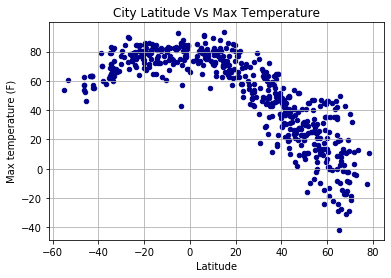

In [44]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')



plt.title('City Latitude Vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("Lat_vs_Temp.png")
plt.show


#### Latitude vs. Humidity Plot

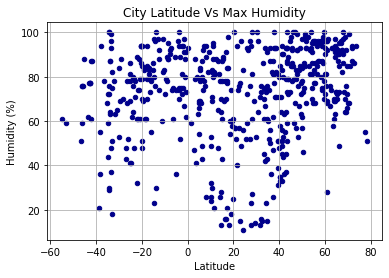

In [45]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')

plt.title('City Latitude Vs Max Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Lat_vs_Humidity.png")
plt.grid()




#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

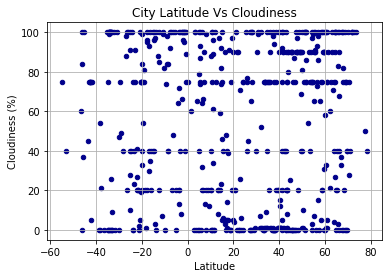

In [47]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Lat_vs_Cloud.png")
plt.show



#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

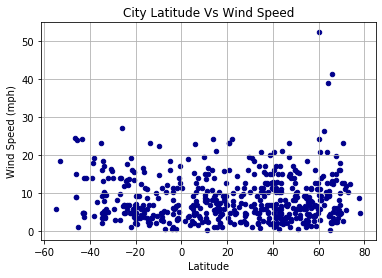

In [48]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Lat_vs_wind.png")
plt.show